# Trabajo I. Simulación de Riesgos y Coberturas

* Guerra Alcalá Daniela
* Hernández Mota Rodrigo
* Rodríguez Cañedo Yolanda

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import norm

from cvxopt import matrix, solvers  
from financial_series.everything import *

## Introducción

La simulación es una herramienta que permite explorar distintas alternativas y posibilitan que las decisiones sean mejores, rápidas y con una planificación más efectiva. Una definición más formal sería que un modelo de simulación financiera es una representación matemática de una determinada realidad en la que se simplifica la complejidad de la misma con objeto de resaltar aquellas variables que interesan de una forma especial. CITAR
La simulación tiene muchas aplicaciones, sin embargo, en el presente trabajo se utiliza la simulación para la obtención de áreas, volúmenes, generación de trayectorias de activos financieros, valuación de opciones de compra y venta, así como determinación de un portafolio y valuación de su desempeño.
El contenido del documento está dividido en siete secciones:

*	Sección I y II, se expresan dos integrales en términos de valor esperado y se proponen estimadores insesgados.
*	Sección III, se estima el área entre dos curvas.
*	Sección IV, se estima el volumen contenida en una región tridimensional.
*	Sección V, se generan trayectorias del movimiento geométrico browniano.
*	Sección VI, se hace la valuación de opciones.
*	Sección VII, se conforma un portafolio y se valúa su desempeño en base a probabilidades.

## Objetivo Principal


Emplear diversas herramientas y fundamentos teóricos, utilizando simulaciones, para valuar derivados financieros como, en este caso, opciones call y put. Así mismo, generar un portafolio estratégico y valuar su desempeño con simulaciones y en base a probabilidades.

## Objetivos Secundarios

* Proponer estimadores insesgados para integrales definidas.
* Entender el teorema del valor medio para integrales.
* Estimar áreas y volúmenes en un rango o superficie dada mediante simulaciones Montecarlo.
* Generar trayectorias utilizando la de la ecuación diferencial estocástica del precio de un activo con diferentes métodos de aproximación.
* Valuar opciones call y put utilizando diferentes metodologías.
* Entender la diferencia y hacer comparaciones con variables antitéticas.
* Conformar un portafolio y evaluar si desempeño basado en probabilidades con simulación Montecarlo.



## Métodos de simulación para resolver integrales

En esta sección se presentarán métodos de simulación para la resolución de integrales. Por cuestiones ilustrativas, considere las siguentes dos integrales:

I)
\begin{equation}
\int_1^3 e^{x^2} dx
\end{equation}
II)
$$
\int_1^2 \frac{1}{1+x} dx
$$

Si $x$ es una variable aleatoria con distribución $p(x)$ entonces el valor esperado se puede escribir como:

$$
E[x] = \int_{-\infty}^{\infty} x p(x) dx
$$

Sea $f(x)$ una función de la variable aleatoria subyacente, entonces su valor esperado es:

$$
E[f(x)] = \int_{-\infty}^{\infty} f(x) p(x) dx
$$

Supongamos que $x\sim U[a,b]$ donde $a,b$ representa lan los límites de integración correpondientes a cada integral. Por lo tanto: $p(x) = \frac{1}{b-a}$ para toda $x \in [a,b]$ y $p(x)=0$ si $x<a$ ó $x>b$.

Reescribiendo el valor esperado bajo esta consideración se tiene:

$$
E[f(x)] = \int_{a}^{b} f(x) \frac{1}{b-a} dx
$$

Despejando tenemos:

$$
\int_{a}^{b} f(x) dx = (b-a)E[f(x)]
$$

Es decir, el valor de una integral definida en $[a,b]$ se puede calcular con el valor esperado de la función a integrar multiplicado por la lognitud del intervalo en donde $x \sim U[a,b]$.

I)

$$
\int_1^3 e^{x^2} dx = (3-1) E \big[e^{x^2}\big]
$$

II)

$$
\int_1^2 \frac{1}{1+x} dx = (2-1) E \big[\frac{1}{1+x}\big]
$$

Para resolver $E[f(x)]$ de una variable aleatoria uniforme $x \sim U[a,b]$ se propone el estimador $\frac{1}{n}\sum_i^n f(x_i)$ en donde se genera un subconjunto de variables $x_i$ de tamaño $n$ y se calcula el promedio. 

Este estimador cumple con las características de ser consistente e insesgado. 

**Prueba de consistenca**

Se determina si el estimador es consistente cuando el límite refleja el valor estimado. En este sentido:

$$
\lim_{n \to \infty} \frac{1}{n}\sum_i^n f(x_i) = \int_R f(x)p(x)dx
$$

donde $R$ es una región delimitada por la función de probabilidad de $x$. En este caso:

$$
\int_a^b f(x)p(x)dx = E[f(x)]
$$

**Insesgado**

La prueba para un estimador insesgado se determina aplicando el valor esperado.

$$
E\big[\frac{1}{n}\sum_i^n f(x_i)\big] =\frac{1}{n} \int_a^b \sum_i^n f(x_i) p(x) dx = \frac{1}{n} \sum_i^n \int_a^b f(x) p(x) dx = \int_a^b f(x) p(x) dx = E[f(x)]
$$

---

Por lo tanto, se puede observar que el estimador propusto es consistente e insesgado. Como resultado, es posible aproximar el valor de las integrales con lo siguente:

$$
\int_{a}^{b} f(x) dx = \frac{b-a}{n}\sum_i^n f(x_i)
$$

En particular:

I)

$$
\int_1^3 e^{x^2} dx = \frac{3-1}{n}\sum_i^n e^{x_i^2}
$$

II)

$$
\int_1^2 \frac{1}{1+x} dx = \frac{2-1}{n}\sum_i^n \frac{1}{1+x_i}
$$

**Relación del estimador con el teorema del valor medio**

El teorema del valor medio sugiere que si se tiene una función $f(x)$ definida en el intervalo cerrado $[a,b]$ entonces existe un valor $c \in [a,b]$ tal que al evaluarlo en $f$ y multiplicarlo por la longitud del intervalo cumpla con: 

$$
\int_a^b f(x) dx = (b-a) f(c)
$$

$f(c)$ se denomina el valor promedio de $f$ en $[a,b]$.

Para determinar el valor de $f(c)$ se puede usar el promedio de los valores que puede adquirir $f$ en el intervalo definido. Es decir:

$$
\int_a^b f(x) dx = (b-a) f(c) \approx \frac{b-a}{n} \sum_{i=1}^n f(x_i)
$$

en donde el conjunto $x = [a, a+\Delta x, a+2 \Delta x ,...,b]$ y $\Delta x = \frac{b-a}{n}$

Es facil demostrar que cuando $n \to \infty$ entonces $\frac{b-a}{n} \sum_{i=1}^n f(x_i) \to \int_a^b f(x) dx$.

Teniendo esto en mente, se propone obtener la solución de la integral mediante simulación. Es decir, se toma un muestreo aleatorio del intervalo en donde cada $x_i \sim U[a,b]$. Con esta variable aleatoria podemos estimar $p=\frac{1}{n}\sum_i^n f(x_i)$, donde $x_i \in [a,a+\Delta x,\ldots,b]$ por $p=E[f(x)]$ en donde $x\sim U[a,b]$.

De esta forma tenemos:

$$
\int_a^b f(x) dx = (b-a) E[f(x)]
$$

donde

$$
x \sim U[a,b]
$$

Por lo tanto, se propone un estimador insesgado para el valor esperado, resultando en:

$$
\int_a^b f(x) dx = \frac{b-a}{n} \sum_{i=1}^n f(x_i)
$$
donde
$$
x_i \sim U[a,b]
$$


Como se puede observar, siguendo tal lógica se llega al mismo método de estimación propuesto previamente. 

Sustituyendo en la integrales se obtiene: 

I) 

$$
\int_1^3 e^{x^2} dx = \frac{2}{n} \sum_{i=1}^n e^{x_i ^2}
$$

II)

$$
\int_1^2  \frac{1}{1+x} dx = \frac{1}{n} \sum_{i=1}^n \frac{1}{1+x_i}
$$

**Variables antitéticas para simulación**

Por el momento se ha propuesto estimar el valor de una integral definida $f(x)$ en el intervalo cerrado $[a,b]$ usando variables aleatorias uniformes. 

Sin embargo, es posible usar variables antitéticas para calcular esta estimación de las integrales con la aproximación del valor medio. 

Una variabiable antitética es aquella que tiene la misma distribución de una variable referencia pero está negativamente correlacionada. En el caso de las variables unformes, una variable antitética de $x$ tiene la forma $1-x$. En el caso de la distribución normal estandard, una variable antitética de $x$ tiene la forma $-x$. 

El uso de estas variables permite reducción de varianza. Esto ocurre cuando se utilizan para simulación. En particular: 

$$
Var(a,b) = var(a) + var(b) + 2\rho\sigma_a \sigma_b
$$

Si $b$ es la variable antitética de $a$ entonces $\rho_{a,b} < 0$ lo cual resulta en una reducción de varianza. 

---

El siguente código representa la teoría presentada anteriormente para resolver el caso de la interal I) y II). La función **properIntegral** soluciona la integral propia de una función $f$ entre $[a,b]$ con $n$ simulaciones y permite el uso de variables antitéticas cuando *anti=True*. 

La función **integral** hace un cambio de variables por $x=tan(x)$ de tal forma que una integral indefinida pueda ser resuelta como una integral propia. En particular: 

$$
\int_{a}^{b} f(x)dx = \int_{\arctan(a)}^{\arctan(b)} 2\frac{f(\tan(x))}{1+\cos(2x)}dx 
$$

Donde $a,b \in R$. Esto permite resolver lso casos particulares en donde $a, b\to \infty$.

In [551]:
from numpy.random import uniform

def properIntegral(f,a,b,n=10**7,anti=False):
    rnd = uniform(a,b,size=n)
    return (b-a)*sum(list(map(f,rnd)))/n if not anti else ((b-a)*sum(list(map(f,rnd)))/n + (b-a)*sum(list(map(f,b-rnd+a)))/n)/2

def changeLimits(a,b):
    a = -np.pi/2 if a=='-inf' else np.arctan(a)
    b =  np.pi/2 if b=='inf'  else np.arctan(b)
    return a,b

def integral(f,a,b,n=10**5,anti=False):
    f_u = lambda x: 2*f(np.tan(x))/(1+np.cos(2*x))
    a,b = changeLimits(a,b)
    return properIntegral(f_u,a,b,anti=anti)


A continuación se resuelven las integrales con el uso de variables aleatorias uniformes. 

In [552]:
print('\nSolución de integral  I) {:0.8}'.format(properIntegral(lambda x:np.exp(x**2),1,3)))
print('\nSolución de integral II) {:0.4}'.format(properIntegral(lambda x:1/(1+x),1,2)))


Solución de integral  I) 1442.9347

Solución de integral II) 0.4055


Agregando las variables antitéticas la solución obtenida es:

In [553]:
print('\nSolución de integral con var.antitéticas  I) {:0.8}'.format(
        properIntegral(lambda x:np.exp(x**2),1,3,anti=True)))
print('\nSolución de integral con var.antitéticas II) {:0.4}'.format(
        properIntegral(lambda x:1/(1+x),1,2,anti=True)))


Solución de integral con var.antitéticas  I) 1442.4348

Solución de integral con var.antitéticas II) 0.4055


**Resultados**:

| Integral | Uniform Random Variables  | With Antithetic Variables|
|------|------|------|
|   $\int_1^3 e^{x^2} dx$  | 1442.9347 | 1442.4348 |
|   $\int_1^2  \frac{1}{1+x} dx$  | 0.4055 | 0.4055|


## Estimación de área (contenido en región de 2 dimensiones)

En este apartado se muestra el método de simulación para determinar el área de una región (por lo tanto, bidimensional). Considere las siguentes parábolas:

$$
P_1(x) = x^2 - x + \frac{1}{2}
$$

$$
P_2(x) = -x^2 + x + \frac{1}{2}
$$

Usando cálculo convensional se puede determinar el área delimitada por tales funciones. 

Para obtener los puntos que delimitan al intervalo (raíces de la función) en el que estará el área entre las dos parábolas, se igualan ambas funciones y se despeja la variable $x$.

$$
x^2 - x + \frac{1}{2} = -x^2 + x + \frac{1}{2} \\
2x^2 - 2x = 0 \\
2(x^2 -x) = 0 \\
x^2 -x = 0 \\
x(x-1) = 0 \\
x_1 = 1 \\
x_2 = 0 \\
$$

A continuación se muestra la gráfica de ambas parábolas, donde se observa los puntos que delimitan al área a obtener.

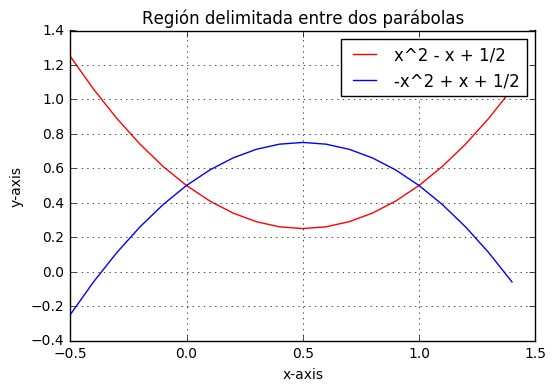

In [2]:
def f1(x):
    return x**2 - x + 1/2 

def f2(x):
    return -x**2 + x + 1/2


x = np.arange(-0.5,1.5,0.1)

plt.plot(x,f1(x),'r')
plt.plot(x,f2(x),'b')
plt.legend(['x^2 - x + 1/2','-x^2 + x + 1/2'])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Región delimitada entre dos parábolas')
plt.grid()
plt.show()

Con tal información, se determina el área delimitada mediante una resta de integrales en el intercalo deseado. 

$$
\int_0^1 -x^2 + x + \frac{1}{2} - (x^2 - x + \frac{1}{2}) dx \\
= \int_0^1 -2x^2 + 2x dx \\
= -2 \frac{x^3}{3} + 2 \frac{x^2}{2} \big|_0^1 = -\frac{2x^3}{3} + x^2 \big|_0^1 \\
= -\frac{2(1)^3}{3} + (1)^2 \big|_0^1 \\
= -\frac{2}{3} + 1 \\
= \frac{1}{3}
$$

Al igual que en la sección anterior, se puede usar simulación montecarlo para calcular el área determinada por las parábolas $P_1, P_2$.

Para obtener esta área se utiliza la siguente expresión explidad en incisos anteriores:

$$
\int_a^b f(x) dx = \frac{b-a}{n} \sum_{i=1}^n f(x_i)
$$
donde
$$
x_i \sim U[a,b]
$$

Por lo tanto podemos usar una simple resta de integrales basandonos en el código ya programado. 

In [555]:

area_vm = integral(f2,0,1) - integral(f1,0,1)

print('\nEl área delimitada por las parábolas utilizando la metodología del'
      +' valor medio en el intervalo [a,b] es de {:0.4}'.format(area_vm))



El área delimitada por las parábolas utilizando la metodología del valor medio en el intervalo [a,b] es de 0.3332


Otra forma de estimar el área es usar simulación montecarlo directamente en la región de interés. Es decir, se genera un par de números aleatorios $x,y$ uniformes en una region cuadrada $[0,1]$ para $x$ y $y$. Después, se determina la proporción de tal par de números que cumplen con:

$$
(x,y) \quad\big|\quad \big\{0 \leq x \leq 1 \quad \textrm{&} \quad x^2 - x + \frac{1}{2} \leq y \leq -x^2 + x + \frac{1}{2}\big\}
$$


Dado esta proporción sabemos que el área delimitada es el aŕea región cuadrada por este factor. A continuación se muestra el código para calcular el área de esta forma. 

In [556]:
# Calculo de área/volumen/... generalizado para n variables.

def getArea(logic_region,intervals,anti=False,_plot=True):
    '''
    Variables:
    logic_region: función que regresa True/False dependiendo de vector X=[x,y,z,...]
    intervals: diccionario que contiene los límites para cada variables e.g. {'x':[0,1],'y':[10,15],...}
    '''
    
    # define number of points 
    n_points = 10**5

    
    core = {}
    anti_core = {}
    factor = 1
    for z in intervals:
        rnd = np.random.uniform(intervals[z][0],intervals[z][-1],n_points)
        core[z] = rnd
        factor  = factor*(intervals[z][-1]-intervals[z][0])
        if anti:
            anti_core[z] = intervals[z][-1] - rnd + intervals[z][0]
        
    datapoints = pd.DataFrame(core)
    if anti:
        anti_datapoints = pd.DataFrame(anti_core)

    # datapoints that satisfy f(.)
    valid = datapoints.apply(lambda x: logic_region(x),1)
    if anti:
        anti_valid =  datapoints.apply(lambda x: logic_region(x),1)

    # calculate area
        
    area = factor*sum(valid)/n_points if not anti else factor*(sum(valid)+sum(anti_valid))/(2*n_points)

    # plot result
    if _plot:
        datapoints[valid].plot(kind='scatter',x='x',y='y')
        plt.title('Área = {}'.format(area))
        plt.show()
        
    return area

Se define la región y el intervalo de búsqueda: 

In [557]:
def region(x):
    x, y = x[0],x[1]
    return (0<x) and (x<1) and (x**2 - x + 1/2 < y) and (y < -x**2 +x + 1/2)


intervals = {'x':[0,1],'y':[0,1]}

Se procede a usar las funciones para calcular el área: 


Área de región calculada mediante simulación montecarlo.


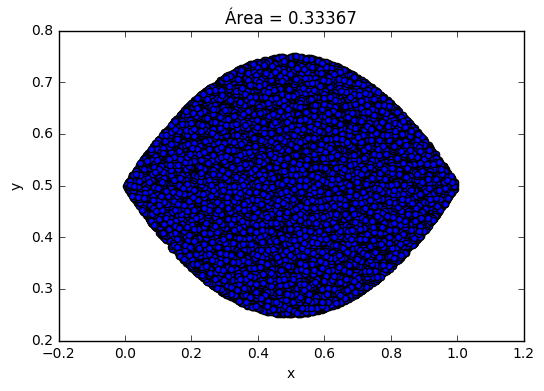

0.33367000000000002

In [558]:
print('\nÁrea de región calculada mediante simulación montecarlo.')
getArea(region,intervals)

Usando variables antitéticas tenemos:


Area de región calculada mediante simulación montecarlo con variables anitéticas.


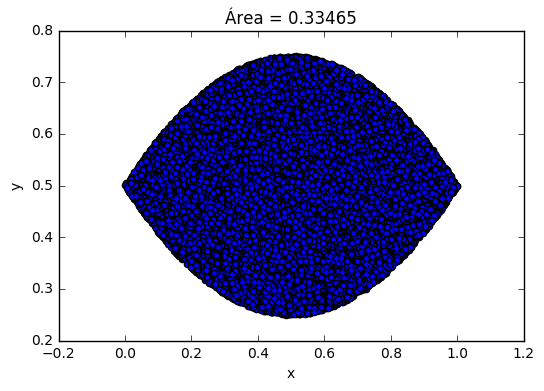

0.33465

In [559]:
print('\nArea de región calculada mediante simulación montecarlo con variables anitéticas.')
getArea(region,intervals,anti=True)

**Diferencia entre resta de integrales con simulación y determinación del área directa mediante montecarlo.**

Para la determinación del area por resta de integrales basado en aproximación por montecarlo se utilizan los principios del teorema de valor medio para proponer una solución numérica a ambas funciones en el intervalo deseado. Para determinar el área de la región, simplemente se hace una resta del resultado de las dos integrales.

Por otra parte, al calcular el área directamente con montecarlo se define una región de dos dimensiones (generalmente cuadrada o rectangular) que contiene a una subregión de interés. Se generan numeros aleatorios uniformes para la primer región y se calcula el la proporción de tales realizaciones que cumplen con la región de interés. De esta forma se puede determinar el area. 

**Comparación**

|Método|Área|
|----|----|
|Analítico|1/3|
|Resta de integrales|0.3332|
|Variable Aleatoria Uniforme|0.3336|
|Con Variables Antitéticas|0.3346|

## Estimación de volúmen (región de tres dimensiones)

Considere un elipsoide contenido en un cubo unitario y definido por la región:

$$
2 + 4x^2 + 4z^2 + y^2 \leq 4x + 4z + y
$$

Cubo unitario:

$$
0 \leq x,y,z \leq 1
$$

La función desarrollada en el inciso anterior nos permite calcular el volúmen facilmente. 

Se declara la región de interés y los intervaloes de búsqueda. Después se procede a usar la función para obtener el resultado. 

In [560]:
def region(x):
    x,y,z = x[0],x[1],x[2]
    return 2 + 4*x**2 + 4*z**2 + y**2 <= 4*x +4*z +y

intervals = {'x':[0,1],'y':[0,1],'z':[0,1]}
vol = getArea(region,intervals,_plot=False)

print('\nEl volumen estimado es de {} unidades cúbicas.'.format(vol))


El volumen estimado es de 0.13066 unidades cúbicas.


Usando variables antitéticas se obtiene:

In [562]:
anti_vol = getArea(region,intervals,_plot=False,anti=True)
print('\nEl volumen estimado mediante variables antitéticas es de {} unidades cúbicas.'.format(anti_vol))


El volumen estimado mediante variables antitéticas es de 0.13045 unidades cúbicas.


#### Estimación del error

In [564]:
vol_real = np.pi/24
error = vol_real - vol
anti_error = vol_real - anti_vol

print('\nEl error de la estimación del volumen es de: {}'.format(error))
print('El error de la estimación del volumen con variables antitéticas es de: {}'.format(anti_error))


El error de la estimación del volumen es de: 0.00023969389957470555
El error de la estimación del volumen con variables antitéticas es de: 0.0004496938995746935


#### Comparación

|Método|Volumen|Error|
|----|----|----|
|Variable Aleatoria Uniforme|0.1306|0.00023|
|Con Variables Antitéticas|0.1304|0.00044|

## Simulación de Trayectorias

Usando el movimiento geométrico browniano $dS_t = \mu S_t dt+\sigma S_t dW_t$ es posible determinar una ecuación diferencial estocástica para $f = \ln S_t$.

Utilizando la expansión de serie de Taylor:

$$
df=\frac{\partial f}{\partial t}dt+\frac{\partial f}{\partial S_t}dS_t+\frac{1}{2}\big( \frac{\partial^2 f}{\partial t^2}(dt)^2+\frac{\partial^2 f}{\partial S_t^2}+2\frac{\partial^2 f}{\partial t S_t}(dt)(dS_t) \big)
$$

Y sabiendo que:

$$
(dS_t)^2=\sigma^2S_t^2dt \\
\frac{\partial f}{\partial t} = 0 \\
\frac{\partial f}{\partial S_t} = \frac{1}{S_t} \\
\frac{\partial^2 f}{\partial S_t^2} = -\frac{1}{S_t^2}
$$

Es trivial obtener: 

$$
d\ln S_t = (\mu - \frac{\sigma^2}{2})dt + \sigma dW_t
$$

Discretizando obtenemos:

$$
\ln S_T - \ln S_t = (\mu - \frac{\sigma^2}{2})(T-t) + \sigma \sqrt{T-t} Z_t \\
\ln S_T = \ln S_t + (\mu - \frac{\sigma^2}{2})(T-t) + \sigma \sqrt{T-t} Z_t
$$

donde $Z_t \sim N(0,1)$.

In [565]:
# Generador de Z_t
def randomNormal(n,mu=0,sigma=1):
    return np.random.normal(mu,sigma,n)

Despejando para $S_T$ se obtiene la solución para la ecuación diferencial estocástica:

$$
S_T = S_t e^{(\mu - \frac{\sigma^2}{2})(T-t) + \sigma \sqrt{(T-t)} Z_t}
$$

Basandonos en esta solución se propone el siguiente método de simulación montecarlo adecuando la posibilidad de usar variables antitéticas.

In [566]:
def mTrajectoriesNormal(S0=100,mu=0,sigma=0.2,T=1,n=360,m=1,anti=False):
    dt = T/n
    mu_t, sigma_t = (mu-sigma**2/2)*dt, sigma*np.sqrt(dt)
    
    # Check if add one and "m" value 
    add_one = m%2 if anti else 0
    m = m if not anti else (int(m/2) if not m%2 else int((m-1)/2))
    
    # Generate random variable
    rnd = list(map(lambda x: randomNormal(n,mu=0,sigma=1),range(m)))
    rnd = rnd if not anti else (rnd+[-r for r in rnd])
    rnd = rnd+[randomNormal(n,mu=0,sigma=1)] if add_one else rnd

    log_increment = [np.concatenate([np.array([np.log(S0)]),sigma_t*i+mu_t]) for i in rnd]
    log_path      = [np.cumsum(i) for i in log_increment]
    return pd.DataFrame(np.asmatrix([np.exp(i) for i in log_path]).T)

Procedemos a calcular $m$ trayectorias con $\mu=0$, $\sigma=0.2$, $S_t=100$ y $n$ pasos.

In [277]:
%%time
tray = mTrajectoriesNormal(m=100)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 9.36 ms


In [278]:
print('Volatilidad del precio en el tiempo T: {:0.5}'.format(tray.iloc[-1].std()))

Volatilidad del precio en el tiempo T: 23.519


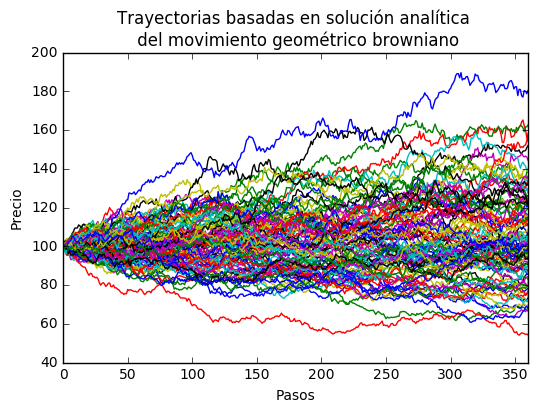

In [279]:

tray.plot(legend=False)
plt.title('Trayectorias basadas en solución analítica \n del movimiento geométrico browniano')
plt.ylabel('Precio')
plt.xlabel('Pasos')
plt.show()

Usando variables antitéticas tenemos:

In [280]:
%%time
tray = mTrajectoriesNormal(m=100,anti=True)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 9.01 ms


In [281]:
print('Volatilidad del precio en el tiempo T: {:0.5}'.format(tray.iloc[-1].std()))

Volatilidad del precio en el tiempo T: 17.853


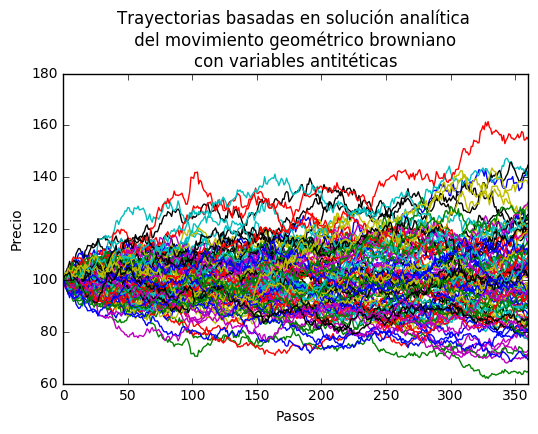

In [282]:
tray.plot(legend=False)
plt.title('Trayectorias basadas en solución analítica \n del movimiento geométrico browniano \ncon variables antitéticas')
plt.ylabel('Precio')
plt.xlabel('Pasos')
plt.show()

A continuación se calcula la simulación de las trayectorias con dos métodologías de aproximación numérica para resolver la ecuación diferencial estocástica: **Euler-Maruyama** y **Milstein**. 

### Euler-Maruyama

Este es un método muy efectivo para aproximar la solución numérica a una ecuación diferencial estocástica. Permite aplicar el método Euler generalizado para ecuaciones diferenciales ordinarias, en ecuaciones diferenciales estocásticas.\

Podemos escribir la ecuación diferencial de la siguiente manera:

$$
dX_{(t)} = f(X_{(t)}) dt + g(X_{(t)}), \qquad X(0) = X_0, \quad 0 \leq t \leq T
$$

Lo primero que se debe hacer para poder aplicar el método Euler-Maruyama a la ecuación anterior es discretizar el intervalo [0,T]. Sea $\Delta_t = \frac{T}{L}$ para el entero positivo L, y $\tau_i = i\Delta_t$. La aproximación numérica a X($\tau_i$) se denotará como $X_i$. Reescribimos la ecuación de la siguiente manera:

$$
X_i = X_{i-1} + f(X_{i-1}) \Delta_t + g(X_{i-1})(W_{\tau_i}-W_{\tau_{i-1}}),  \hspace{0.5cm} i = 1,2,...,n
$$

Aplicando el método a un movimiento geométrico browniano, la ecuación $dX_{(t)}$ se modifica, quedando de la siguiente manera:

$$
dX_{(t)} =\mu X_{(t)} dt + \sigma X_{(t)} dWt \hspace{0.5cm} donde \hspace{0.5cm} X(0) = X_0
$$

Por lo que la ecuación $X_i$ se puede rescribir de la siguiente manera:
$$
\begin{split}
X_i &= X{i-1} + \mu X_{i-1} dt + \sigma X_{i-1} dWt \\
X_i &= X_{i-1} + \mu X_{i-1}\Delta_t + \sigma X_{i-1} \varepsilon_i \sqrt{\Delta_t} , \hspace{0.5cm} \Delta_t = \frac{T}{n} \\
X_i &= X_{i-1} \left(1+ \mu\Delta_t + \sigma \varepsilon_i \sqrt{\Delta_t} \right) , \hspace{0.5cm} \epsilon \sim \mathcal{N}(0,1)
\end{split}
$$


A continuación se define una función para calcular m trayectorias. 

In [582]:
# Eurler maruyama 

def eulerMaruyamaTrajectories(S0=100,mu=0,sigma=0.2,T=1,n=360,m=1,anti=False):
    dt = T/n
    
    # Check if add one and "m" value 
    add_one = m%2 if anti else 0
    m = m if not anti else (int(m/2) if not m%2 else int((m-1)/2))
    
    # Generate random variable
    rnd = list(map(lambda x: randomNormal(n,mu=0,sigma=1),range(m)))
    rnd = rnd if not anti else (rnd+[-r for r in rnd])
    rnd = rnd+[randomNormal(n,mu=0,sigma=1)] if add_one else rnd
    
    
    #rnd = list(map(lambda x: randomNormal(n,mu=0,sigma=1,anti=anti),range(m)))
    
    # define euler maruyama algorithm
    def eulerMaruyamaAlgorithm(x0,x_vect,mu,sigma,dt):
        maruyama_simul = []
        for i in x_vect:
            maruyama_simul.append(x0*(1+mu*dt+sigma*i*np.sqrt(dt)))
            x0 = maruyama_simul[-1]
        return np.array(maruyama_simul)
    
    return pd.DataFrame(np.asmatrix(list(map(lambda x: eulerMaruyamaAlgorithm(x0=S0,x_vect=x,mu=mu,sigma=sigma,dt=dt),rnd))).T)
    
    

Procedemos a evaluar el algorítmos usando los mismos parámetros. 

In [568]:
%%time
tray = eulerMaruyamaTrajectories(m=100)

CPU times: user 124 ms, sys: 0 ns, total: 124 ms
Wall time: 125 ms


In [569]:
print('Volatilidad del precio en el tiempo T: {:0.5}'.format(tray.iloc[-1].std()))

Volatilidad del precio en el tiempo T: 21.61


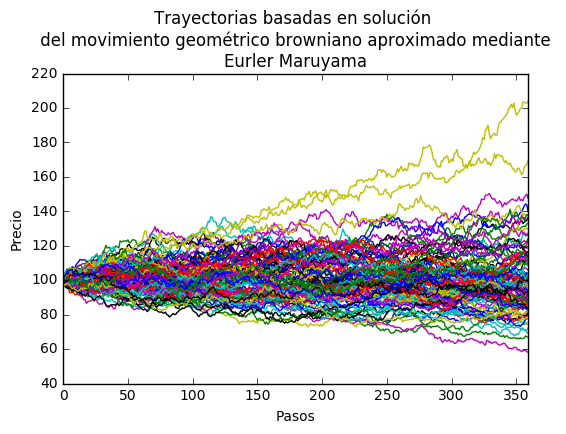

In [571]:
tray.plot(legend=False)
plt.title('Trayectorias basadas en solución \n del movimiento geométrico browniano aproximado mediante \nEurler Maruyama')
plt.ylabel('Precio')
plt.xlabel('Pasos')
plt.show()

Con variables antitéticas obtenemos:

In [572]:
%%time
tray = eulerMaruyamaTrajectories(m=100,anti=True)

CPU times: user 120 ms, sys: 0 ns, total: 120 ms
Wall time: 118 ms


In [573]:
print('Volatilidad del precio en el tiempo T: {:0.5}'.format(tray.iloc[-1].std()))

Volatilidad del precio en el tiempo T: 18.65


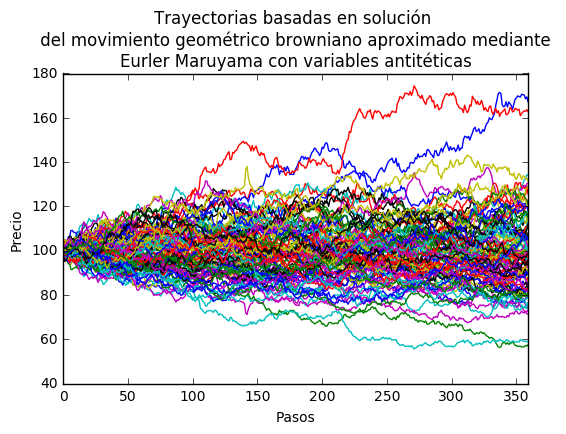

In [574]:

tray.plot(legend=False)
plt.title('Trayectorias basadas en solución \n del movimiento geométrico browniano aproximado mediante \nEurler Maruyama con variables antitéticas')
plt.ylabel('Precio')
plt.xlabel('Pasos')
plt.show()

### Milstein


El método Milstein es una técnica para la solución numérica aproximada de una ecuación diferencial estocástica, que trata de mejorar la segunda aproximación de la ecuación del movimiento geométrico browniano, aplicando el lema de Itô. Los coeficientes $\mu$ y $\sigma$ dependen solo de $X$ y no dependen de $t$ directamente.

Considerando las expansiones de los coeficientes $\mu_t = \mu(X_t)$ y $\sigma_t = \sigma(X_t)$, se aumenta la exactitud de la discretizaci\'on. La ecuaci\'on se transforma de la siguiente manera:

$$
X_i = X_{i-1} + f(X_{i-1}) \Delta_t + g(X_{i-1})(W_{\tau_i}-W_{\tau_{i-1}}) + \frac{1}{2}g(X_{i-1})g'(X_{i-1}) \left((W_{\tau_i}-W_{\tau_{i-1}})^2 - \Delta_t \right), \hspace{0.5cm} i = 1,2,...,n
$$

Se añade un término de segundo orden a la ecuación de Euler-Maruyama, la cuál podemos escribir:

$$
X_i = X_{i-1} \left(1+ \mu\Delta_t + \sigma \varepsilon_i \sqrt{\Delta_t} + \frac{1}{2} \sigma^2 \Delta_t \varepsilon_{i-1}^2 - \Delta_t  \right),  \hspace{0.5cm}  \Delta_t = \frac{T}{n}, \hspace{0.5cm}  \varepsilon \sim N(0,1)
$$


A continuación se define la función para calcular m trayectorias. 

In [575]:
def milsteinTrajectories(S0=100,mu=0,sigma=0.2,T=1,n=360,m=1,anti=False):
    dt = T/n
    
    
    # Check if add one and "m" value 
    add_one = m%2 if anti else 0
    m = m if not anti else (int(m/2) if not m%2 else int((m-1)/2))
    
    # Generate random variable
    rnd = list(map(lambda x: randomNormal(n,mu=0,sigma=1),range(m)))
    rnd = rnd if not anti else (rnd+[-r for r in rnd])
    rnd = rnd+[randomNormal(n,mu=0,sigma=1)] if add_one else rnd
    
    # define milstein algorithm
    def milsteinAlgorithm(x0,x_vect,mu,sigma,dt):
        milstein_simul = []
        for i in x_vect:
            milstein_simul.append(x0*(1+mu*dt+sigma*i*np.sqrt(dt)+(sigma**2*dt*i**2)/2)-dt)
            x0 = milstein_simul[-1]
        return np.array(milstein_simul)
    
    return pd.DataFrame(np.asmatrix(list(map(lambda x: milsteinAlgorithm(x0=S0,x_vect=x,mu=mu,sigma=sigma,dt=dt),rnd))).T)
    

Se utilizan los mismos criterios para generar la simulación. 

In [576]:
%%time
tray = milsteinTrajectories(m=100)

CPU times: user 184 ms, sys: 0 ns, total: 184 ms
Wall time: 184 ms


In [577]:
print('Volatilidad del precio en el tiempo T: {:0.5}'.format(tray.iloc[-1].std()))

Volatilidad del precio en el tiempo T: 21.137


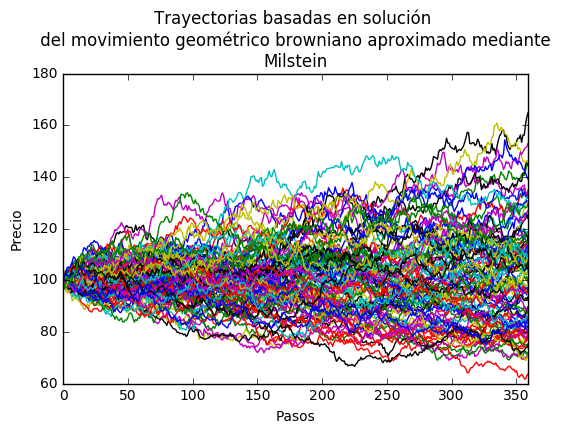

In [578]:
tray.plot(legend=False)
plt.title('Trayectorias basadas en solución \n del movimiento geométrico browniano aproximado mediante \nMilstein')
plt.ylabel('Precio')
plt.xlabel('Pasos')
plt.show()

Usando variables antitéticas:

In [579]:
%%time
tray = milsteinTrajectories(m=100,anti=True)

CPU times: user 196 ms, sys: 0 ns, total: 196 ms
Wall time: 203 ms


In [580]:
print('Volatilidad del precio en el tiempo T: {:0.5}'.format(tray.iloc[-1].std()))

Volatilidad del precio en el tiempo T: 17.499


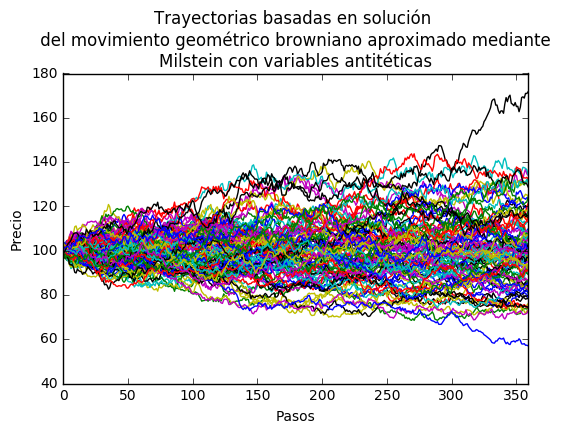

In [581]:
tray.plot(legend=False)
plt.title('Trayectorias basadas en solución \n del movimiento geométrico browniano aproximado mediante \nMilstein con variables antitéticas')
plt.ylabel('Precio')
plt.xlabel('Pasos')
plt.show()

### Comparación

|Movimiento Geométrico Browniano|Tipo de variables|Tiempo de ejecución|Volatilidad|
|----|----|----|----|
|Basada en solución analítica|Normal|12 ms|23.519|
|Basada en solución analítica|Antitéticas|8 ms|17.853|
|Basado en Euler-Mayurama|Normal|124 ms|21.61|
|Basado en Euler-Mayurama|Antitéticas|120 ms|18.65|
|Basado en Milstein|Normal|184 ms|21.137|
|Basado en Milstein|Antitéticas|196 ms|17.49|


Como es de esperarse, el uso de variables antitéticas en las simulaciones redujo de varianza obtenida. 

### Valuación de opciones

**Opciones**

Son un instrumento financiero, derivado, que se establece en un contrato y da a su comprador el derecho, pero no la obligación, a comprar o vender el activo subyacente a un precio predeterminado, en una fecha de vencimiento. Existen dos tipos de opciones: opción de compra (call) y opción de venta (put).

**Opción Call**

Da a su comprador el derecho a comprar un activo. El vendedor de la opción de compra tiene la obligación de vender el activo en el caso de que el comprador ejerza el derecho a comprar.

Se tienen entonces dos posibilidades:

1. $S_t - K \geq 0$, se compra.
2. $S_t - K < 0$, no se compra.

**Opción Put**

Da a su poseedor el derecho de vender un activo. El comprador de la opción de venta tiene la obligación de comprar el activo subyacente si el tenedor de la opción decide ejercer su derecho.

Se tienen entonces dos posibilidades:

1. $S_t - K > 0$, se vende.
2. $S_t - K \leq 0$, no se vende.


---

El precio de una opción en el tiempo $t$ se calcula como:

$$
f_t = \hat{E}_t[f_T] e^{-r(T-t)}
$$

Para los distintos casos de opciones europeas se tiene:

* Opción Call: $f_T=max(S_T-K,0)$
* Opción Put:  $f_T=max(K-S_T,0)$

Si realizamos el cambio de variables $x = \ln(S_T/S_t)$ entonces podemos usar: 

$$\ln S_T = \ln S_t + (\mu - \frac{\sigma^2}{2})(T-t) + \sigma \sqrt{T-t} Z_t
$$

Por consecuencia: 

$$
x \sim N \big( (\mu - \frac{\sigma^2}{2})(T-t), \sigma^2(T-t)\big)
$$

Sustituyendo:
$$
f_t = e^{-r(T-t)} \frac{1}{\sigma\sqrt{2\pi(T-t)}} \int_{-\infty}^{\infty} f_T e^{-\frac{\big(x -(\mu-\frac{\sigma^2}{2})(T-t)\big)^2}{2\sigma^2(T-t)}}
$$





Sabiendo esto, se puede escribir la valuación de la opción europea como:

* Opción Call: $f_t = e^{-r(T-t)} \int_{\ln(K/S_t)}^{\infty} (S_te^x-K)p(x)dx$
* Opción Put: $f_t =  e^{-r(T-t)} \int_{-\infty}^{\ln(K/S_t)} (K-S_te^x)p(x)dx$

donde $p(x)=\frac{1}{\sigma\sqrt{2\pi(T-t)}}e^{-\frac{\big(x-(\mu-\frac{\sigma^2}{2})(T-t)\big)^2}{2\sigma^2(T-t)}}$

Es posible resolver estas integrales mediante el **teorema del valor medio**. 

Se definen los parámteros de ejemplo para comparar las metodologías:

In [456]:
# Define parameters 

parameters={
    'St':100,
    'K':102,
    'T':1,
    't':0,
    'r':0.0629,
    'sigma':0.18,
    'n':1000,
    'm':5000
}

p = parameters

Proseguimos por definir la función de probabilidad y las funciones para las opciones call y put. 

In [449]:

def prob(x,p=parameters):
    return np.exp(-(x-(p['r']-p['sigma']**2/2)*(p['T']-p['t']))**2/(2*p['sigma']**2*(p['T']-p['t'])))/(p['sigma']*np.sqrt(2*np.pi*(p['T']-p['t'])))

def function_call(x,p=parameters):
    return 0 if prob(x)==0 else np.exp(-p['r']*(p['T']-p['t']))*(p['St']*np.exp(x)-p['K'])*prob(x)

def function_put(x,p=parameters):
    return 0 if prob(x)==0 else np.exp(-p['r']*(p['T']-p['t']))*(p['St']*np.exp(x)-p['K'])*prob(x)

Se estima el precio de una opción call y put usando simulación montecarlo basado en el teorema del valor medio.

In [452]:
a = np.log(parameters['K']/parameters['St'])
b = 'inf'
integral_call = integral(function_call,a,b,anti=False)

print('Valor de opción Call resolviendo integral: {:0.4f}'.format(integral_call))

Valor de opción Call resolviendo integral: 9.3669


In [453]:
a = '-inf'
b = np.log(parameters['K']/parameters['St'])
integral_put = integral(function_put,a,b)

print('Valor de opción Put resolviendo integral: {:0.4f}'.format(-integral_put))

Valor de opción Put resolviendo integral: 5.0784


Otra metodología para valuar opciones consiste en resolver de **forma analítica** las integrales y sustitir valor. En este caso, las soluciones están dadas por:

* Call:$f_t =  S_tN(d_1)-KN(d_2)e^{-r(T-t)}$
* Put: $f_t = -S_tN(-d_1)+KN(-d_2)e^{-r(T-t)}$

donde $d_1=\frac{\ln{(S_t/k)+(r+\sigma^2/2)(T-t)}}{\sigma\sqrt{T-t}}$ y $d_2=d_1-\sqrt{\sigma(T-t)}$

La siguiente función usa esta definición para calcular el precio de las opciones. 

In [79]:
def analyticBlackScholes(_type,St,K,r,sigma,T,t):
    d1 = (np.log(St/K)+(r+sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1-sigma*np.sqrt(T-t)
    
    if _type=='call':
        return St*norm.cdf(d1)-K*np.exp(-r*(T-t))*norm.cdf(d2)
    if _type=='put':
        return -St*norm.cdf(-d1)+K*np.exp(-r*(T-t))*norm.cdf(-d2)
    
    print('Error: Type not found.')
    return None 

Uso:

In [594]:
call_abs = analyticBlackScholes('call',p['St'],p['K'],p['r'],p['sigma'],p['T'],p['t'])
put_abs = analyticBlackScholes('put',p['St'],p['K'],p['r'],p['sigma'],p['T'],p['t'])


print('\nLa prima de una opción call basada en la solución analítica de Black Scholes es de: {:.4}'.format(call_abs))
print('La prima de una opción put basada en la solución analítica de Black Scholes es: {:.4}'.format(put_abs))


La prima de una opción call basada en la solución analítica de Black Scholes es de: 9.329
La prima de una opción put basada en la solución analítica de Black Scholes es: 5.111


Por último, otra forma de valuar opciones es mediante la **simulación del activo subyacente**. En este sentido, se deberá simular de $S_t$ hasta el tiempo de maduración de la opción y de evalúa la función $f_T$ para determinar el posible valor que podría adquirir la opción. Posteriormente el resultado se trae a valor presente. 

$$
\hat{f}_t =  e^{-r(T-t)} \frac{1}{n} \sum_{i = 1}^n f_{T,i}
$$

En la sección anterior se presentaron 3 formas de simular trayectorias. Se usaran estas 3 (con sus corresponientes versiones en antitéticas) para simular la trayectoria del activo subyacente y evaluar el precio de la opción. 

En este sentido se propone la siguente función en la cual se puede especificar el tipo de simulación deseado en el parámetro **simul_type**.

In [591]:
def numericBlackScholes(_type,St,K,r=0,sigma=0.2,T=1,n=360,m=100,simul_type='SoluciónAnalítica',anti=False):
    if simul_type=='SoluciónAnalítica':
        df = mTrajectoriesNormal(n=n,m=m,S0=St,mu=r,sigma=sigma,anti=anti)
    elif simul_type=='EurlerMaruyama':
        df = eulerMaruyamaTrajectories(n=n,m=m,S0=St,mu=r,sigma=sigma,anti=anti)
    elif simul_type=='Milstein':
        df = milsteinTrajectories(n=n,m=m,S0=St,mu=r,sigma=sigma,anti=anti)
    
    if _type=='call':
        return np.exp(-r*(T-t))*((df.iloc[-1]-K).apply(lambda x: 0 if x <=0 else x).mean())
    if _type=='put':
        return np.exp(-r*(T-t))*((K-df.iloc[-1]).apply(lambda x: 0 if x <=0 else x).mean())

### Solución Analítica de EDE

Valuación de opción basado en simulación de la **solución analítica del movimiento browniano**.

In [601]:
call_nbs = numericBlackScholes('call',p['St'],p['K'],p['r'],sigma=p['sigma'],
                               T=p['T'],n=p['n'],m=p['m'])

put_nbs = numericBlackScholes('put',p['St'],p['K'],p['r'],sigma=p['sigma'], 
                              T=p['T'],n=p['n'],m=p['m'])

print('\nLa prima de una opción call basada en la simulación \nde la solución analítica del movimiento geométrico browniano: {:.4}'.format(call_nbs))
print('\nLa prima de una opción put basada en la simulación \nde la solución analítica del movimiento geométrico browniano: {:.4}'.format(put_nbs))



La prima de una opción call basada en la simulación 
de la solución analítica del movimiento geométrico browniano: 9.532

La prima de una opción put basada en la simulación 
de la solución analítica del movimiento geométrico browniano: 5.246


### Euler Maruyama

Valuación de opción basado en simulación de la solución numérica del movimiento browniano mediante **Euler Maruyama**. 

In [587]:
call_nbs = numericBlackScholes('call',p['St'],p['K'],p['r'],sigma=p['sigma'],T=p['T'],
                               n=p['n'],m=p['m'],simul_type='EurlerMaruyama')

put_nbs = numericBlackScholes('put',p['St'],p['K'],p['r'],sigma=p['sigma'],T=p['T'],
                              n=p['n'],m=p['m'],simul_type='EurlerMaruyama')



print('\nLa prima de una opción call basada en la estimación con EulerMaruyama: {:.4}'.format(call_nbs))
print('La prima de una opción put basada en la estimación con EurlerMaruyama: {:.4}'.format(put_nbs))


La prima de una opción call basada en la estimación con EulerMaruyama: 9.353
La prima de una opción put basada en la estimación con EurlerMaruyama: 5.074


### Milstein 

Valuación de opción basado en simulación de la solución numérica del movimiento browniano mediante **Milstein**. 

In [596]:
call_nbs = numericBlackScholes('call',p['St'],p['K'],p['r'],sigma=p['sigma'],T=p['T'],
                               n=p['n'],m=p['m'],simul_type='Milstein')

put_nbs = numericBlackScholes('put',p['St'],p['K'],p['r'],sigma=p['sigma'],T=p['T'],
                              n=p['n'],m=p['m'],simul_type='Milstein')


print('\nLa prima de una opción call basada en la estimación con Milstein: {:.4}'.format(call_nbs))
print('La prima de una opción put basada en la estimación con Milstein: {:.4}'.format(put_nbs))


La prima de una opción call basada en la estimación con Milstein: 9.771
La prima de una opción put basada en la estimación con Milstein: 4.773


### Reducción de varianza con Antitéticas

In [597]:
print('Usando Variables antitéticas:')

for method in ['SoluciónAnalítica','EurlerMaruyama','Milstein']:
    print('\nMétodo: {}'.format(method))
    for op in ['call','put']:
        temp = numericBlackScholes(op,p['St'],p['K'],p['r'],sigma=p['sigma'],T=p['T'],
                                   n=p['n'],m=p['m'],simul_type=method,anti=True)
        
        print('\t{}: {:0.4f}'.format(op,temp))
    

Usando Variables antitéticas:

Método: SoluciónAnalítica
	call: 9.3599
	put: 5.1511

Método: EurlerMaruyama
	call: 9.1851
	put: 5.0297

Método: Milstein
	call: 9.7112
	put: 4.8935


**Resultado obtenido de calculadora de opciones**

![alt text](https://scontent.xx.fbcdn.net/v/t34.0-0/p280x280/17439693_10156014172314966_224008273_n.png?_nc_ad=z-m&oh=34b0545d83c4aae698fb8ad8bbb84b93&oe=58D171DF "Calculadora de opciones")


* Call: 9.3288
* Put: 5.1106

**Comparación de resultados**

|Método|Variable|Opción Call|Opción Put|
|----|----|----|
|Solución Analítica|NA|9.329|5.111|
|Solución de Integral con MC|Uniformes|9.3669|5.0784|
|Solución Analítica de Mov.Browniano|Normal|9.532|5.246|
|Solución Analítica de Mov.Browniano|Normal Antitética|9.3599|5.1511|
|Euler Maruyama|Normal|9.353|5.074|
|Euler Maruyama|Normal Antitética|9.185|5.0297|
|Milstein|Normal|9.771|4.773|
|Milstein|Normal Antitética|9.7112|4.895|
|Calculadora de opciones|NA|9.3288|5.1106|

## Portafolio financiero

En esta sección se muestra el procedimiento para seleccionar y evaluar un portafolio financiero. 

El siguiente código descarga los precios de 9 emisoras que se tomarán en cuenta para la conformación del portafolio: América Móvil, Grupo Aeroportuario del Sureste, Elektra, Grupo México, Grupo Industria Maseca, Infraestructura Energética Nova, Coca Cola Femsa, Genomma Lab Internacional y Televisa.

In [598]:
stock_name = ['AMXL.MX', 'ASURB.MX', 'ELEKTRA.MX', 'GMEXICOB.MX', 'GRUMAB.MX',
       'IENOVA.MX', 'KOFL.MX', 'LABB.MX', 'TLEVISACPO.MX']

# Determine time-range
_from, _to = '2016/01/01', dt.datetime.strftime(dt.datetime.now(),'%Y/%m/%d')

# Download 
stock = {}
for s in stock_name:
    stock[s] = Stock(units='MXN',stock_name=s,t0=_from,tf=_to)
    stock[s].fill()

Estas empresas forman parte del IPC (Índice de Precios y Cotizaciones) y se obtuvieron de un análisis realizado previamente utilizando 29 empresas de dicho índice. Cómo únicamente 9 de 29 tuvieron una ponderación significativa, se quitaron las demás. Esto tiene sentido puesto que cuando diversificas un portafolio con muchas emisora de diferentes sectores, llega un punto en que el riesgo ya no disminuye y converge.


** Determinación del portafolio **

Las siguientes funciones ajustan los precios de los activos del protafolio para asegurar que tengan la misma fecha de cotización y se calculan rendimientos 

In [602]:
def getAllPrices(dct):
    
    # get first item 
    first = list(dct.keys())[0]
    price = {first:dct[first].prices.Adj_close}
    price = pd.DataFrame(price, index=price[first].index)
    
    # get other items 
    for k in dct:
        if k in [first]:
            continue
        
        # calculate temporal dataframe 
        temp = {k:dct[k].prices.Adj_close}
        temp = pd.DataFrame(temp, index=temp[k].index)
        
        # concatenate
        price = pd.concat([price, temp],axis=1).dropna()
        
    return price

def getAllReturns(dct, _type='log'):
    
    prices = getAllPrices(dct)
    returns = {}
    for i in prices:
        temp = prices[i].values
        if _type == 'log':
            returns[i] = np.log(temp[1:] / temp[:-1])
        if _type == 'nor' or _type == 'simple' or _type == 'sim':
            returns[i] = temp[1:] / temp[:-1] - 1
    return pd.DataFrame(returns, index=prices.index[1:])


def randomProp(n):
    random_numbers = np.random.uniform(0,1,n)
    return random_numbers/sum(random_numbers)

In [603]:
prices = getAllPrices(stock)
returns = getAllReturns(stock, _type='log')
covariance = returns.cov()

Promedio de los rendimientos:

In [604]:
# Means 
print("Return's mean:")

returns_means = returns.mean()
pd.DataFrame(np.asmatrix(returns_means.values),columns=returns_means.index)

Return's mean:


,AMXL.MX,ASURB.MX,ELEKTRA.MX,GMEXICOB.MX,GRUMAB.MX,IENOVA.MX,KOFL.MX,LABB.MX,TLEVISACPO.MX
0,0.000439,0.000943,-0.000041,0.001564,0.000274,0.000563,0.000348,0.001762,0.000224


Desviación de los rendimientos. 

In [605]:
# Standard Deviation
print("Return's std:")

returns_std = returns.std()
pd.DataFrame(np.asmatrix(returns_std.values),columns=returns_std.index)

Return's std:


,AMXL.MX,ASURB.MX,ELEKTRA.MX,GMEXICOB.MX,GRUMAB.MX,IENOVA.MX,KOFL.MX,LABB.MX,TLEVISACPO.MX
0,0.017851,0.013719,0.014952,0.018975,0.013991,0.013187,0.012843,0.022633,0.016183


Covarianza:

In [606]:
returns.cov()

,AMXL.MX,ASURB.MX,ELEKTRA.MX,GMEXICOB.MX,GRUMAB.MX,IENOVA.MX,KOFL.MX,LABB.MX,TLEVISACPO.MX
AMXL.MX,0.000319,0.000040,0.000014,0.000033,0.000019,0.000023,0.000029,-0.000011,0.000064
ASURB.MX,0.000040,0.000188,0.000024,0.000039,0.000044,0.000029,0.000065,0.000036,0.000034
ELEKTRA.MX,0.000014,0.000024,0.000224,-0.000004,0.000002,0.000022,0.000033,0.000076,0.000037
GMEXICOB.MX,0.000033,0.000039,-0.000004,0.000360,0.000004,0.000006,0.000047,0.000045,0.000047
GRUMAB.MX,0.000019,0.000044,0.000002,0.000004,0.000196,0.000015,0.000029,0.000019,-0.000006
IENOVA.MX,0.000023,0.000029,0.000022,0.000006,0.000015,0.000174,0.000018,0.000017,0.000002
KOFL.MX,0.000029,0.000065,0.000033,0.000047,0.000029,0.000018,0.000165,0.000012,0.000042
LABB.MX,-0.000011,0.000036,0.000076,0.000045,0.000019,0.000017,0.000012,0.000512,0.000050
TLEVISACPO.MX,0.000064,0.000034,0.000037,0.000047,-0.000006,0.000002,0.000042,0.000050,0.000262


** Determinación de proporciones **

Se utiliza programación cuadrática para determinar la frontera eficiente usando la metodología de Markowitz. 

En particular se trata de minimizar: 

$$
f \quad = \quad \alpha_2 \quad X \quad \Sigma \quad X^T \quad - \quad \alpha_1 \quad \mu \quad X^T
$$



Para diferentes valores de $\alpha_i$ donde $\Sigma$ son las covarianzas, $\mu$ el promedio y $X$ las proporciones de los activos.  

In [608]:
def getSolutionMkw(returns,alpha_1=1,alpha_2=1):
    """
    Returns an optim.porfolio f
    """
    solvers.options['show_progress'] = False
    
    # number of variables
    r = returns.shape[1]
    
    # mean and covariance
    _mean = returns.mean()
    _cov  = returns.cov()

    # parameters
    P = matrix(alpha_2*_cov.values)
    Q = matrix(-alpha_1*_mean.values)
    G = matrix(-1.*np.identity(r))
    h = matrix([0. for i in range(r)])
    A = matrix([1. for i in range(r)], (1,r))
    b = matrix(1.)
    
    # get solution
    sol = solvers.qp(P,Q,G,h,A,b)
    
    return np.asmatrix([i for i in sol['x']])

In [609]:
alpha2range=np.arange(1,500)

def iterativeSelectionProcess(returns,w_opt_list=None,tolerance=0.05,alpha2range=np.arange(1,500)):
    
    if w_opt_list is None: 
        w_opt_list =  [getSolutionMkw(returns,alpha_2=a2) for a2 in alpha2range]
    
    save_sum = []
    for i in w_opt_list:
        temp = [i[0,j] for j in range(np.shape(i)[1])]
        save_sum = (save_sum + np.array(temp)) if len(save_sum)!=0 else np.array(temp)

    selection = pd.DataFrame(save_sum).apply(lambda x: x>tolerance).values
    cont = len(selection) - np.sum(selection)
    selection = [j for i,j in zip(selection,returns.columns) if i]
    return returns[selection],cont,save_sum

In [610]:
returns = getAllReturns(stock, _type='log')

In [611]:
condition = True
w_opt_list = None 
while(condition):
    returns, cond, ss = iterativeSelectionProcess(returns,w_opt_list,tolerance=0.05*500)
    w_opt_list = [getSolutionMkw(returns,alpha_2=a2) for a2 in np.arange(1,500)]
    condition = False if cond == 0 else condition

De esto se obtiene una lista con las diferentes proporciones de portafolios en la frontera eficiente. 

** Gráfica de la frontera eficiente Markowitz **

In [613]:
def randomPortfolio(returns):
    w = np.asmatrix(np.random.dirichlet(np.ones(returns.shape[1]),size=1)[0])#np.asmatrix(randomProp(returns.shape[1]))
    rp = w.dot(np.asmatrix(returns.mean().values).T)
    rp = np.asscalar(rp)
    
    varp = w.dot(np.asmatrix(returns.cov().values)).dot(w.T)
    varp = np.asscalar(varp)
    
    return rp, np.sqrt(varp)

def generateMultiplePortfolios(m,returns):
    results = {'rp':[],'std':[]}
    
    for i in range(m):
        temp = randomPortfolio(returns)
        results['rp'].append(100*temp[0])
        results['std'].append(100*temp[1])
        
    return pd.DataFrame(results)

def calculatePortfolio(w,returns):
    rp = w.dot(np.asmatrix(returns.mean().values).T)
    rp = np.asscalar(rp)
    
    varp = w.dot(np.asmatrix(returns.cov().values)).dot(w.T)
    varp = np.asscalar(varp)
    
    return 100*rp, 100*np.sqrt(varp)

In [614]:
# Simulate random portfolio 

portfolios = generateMultiplePortfolios(8000,returns)

In [615]:
# Generate Efficient Curve portfolio

port_opt = []
for i in w_opt_list:
    port_opt.append(calculatePortfolio(i,returns))
    
port_opt = pd.DataFrame(port_opt)

In [616]:
port_opt.index = alpha2range

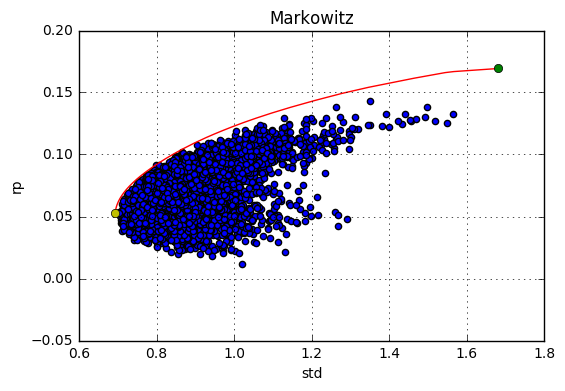

In [617]:

# all portfolios 
portfolios.plot(kind='scatter',x='std',y='rp',grid=True)

# efficient portfolio frontier
plt.plot(port_opt[1],port_opt[0],'r-')

# more risk and returns 
plt.plot(port_opt[1].iloc[0],port_opt[0].iloc[0],'go')

# least risk and returns 
plt.plot(port_opt[1].iloc[-1],port_opt[0].iloc[-1],'yo')

# aesthetics... 
plt.title('Markowitz')
plt.show()

Se selecciona el portafolio con menor riesgo.

In [661]:
# Select final portfolio 

w_opt_matrix = w_opt_list[-1]
pd.DataFrame(100*w_opt_matrix)

,0,1,2,3,4,5,6,7,8
0,7.232475,6.959002,13.044122,8.820539,18.370683,20.234783,11.478298,4.228441,9.631657


In [654]:
w_opt = np.asarray(w_opt_matrix).reshape(-1)

Rendimiento y varianza del portafolio. 

In [662]:
annual_return = 360*np.asscalar(w_opt_matrix.dot(returns.mean().values))
annual_std = np.sqrt(360)*np.sqrt(np.asscalar(w_opt_matrix.dot(returns.cov().values.T).dot(w_opt_matrix.T)))

In [656]:
print('\nPortafolio:\n\t>> Rendimiento anual: {:0.4} %\n\t>> Volatilidad anual: {:0.4} %'.format(
        100*annual_return,100*annual_std))


Portafolio:
	>> Rendimiento anual: 19.09 %
	>> Volatilidad anual: 13.15 %


** Simulación del portafolio **

In [666]:
n_capital = 1000000

In [667]:
def simulate(mu=np.array([0,0]),cov=np.array([[0.2,0],[0,0.2]]),S0=[100,100],T=1,n=360,m=2):
    sigma = [np.sqrt(cov[i][i]) for i in range(len(mu))]
    v = np.linalg.cholesky(cov)
    
    # calculate correlated random numbers
    def generateCorrNumbers(v,nvar,length):
        z_corr = np.asmatrix(v).T.dot(np.asmatrix(np.random.normal(0,1,size=(nvar,length))))
        return np.asarray(z_corr)
    
    # function to generate a single trajectory 
    def generateTraj(S0,mu,sigma,T,n,random_list):
        dt = T/n
        mu_t, sigma_t = (mu-sigma**2/2)*dt, sigma*np.sqrt(dt)
        random_list = mu_t + sigma_t*np.asarray(random_list)
        log_increment = [np.log(S0)]+[i for i in random_list]#np.concatenate([np.array([np.log(S0)]),np.array()])
        log_path      = np.cumsum(log_increment)
        return np.exp(log_path)
      
    random_numbers=[generateCorrNumbers(v,len(mu),n) for i in range(m)]
    
    stocks = [[] for i in range(len(mu))]
    for rnd in random_numbers:
        for i in range(len(mu)):
            stocks[i].append(generateTraj(S0[i],mu[i],sigma[i],T,n,rnd[i]))
            
        
    return [pd.DataFrame(np.asmatrix(s).T) for s in stocks]

Se determina el número de acciones mediante el último precio registrado. 

In [668]:
prices[returns.columns].iloc[-1]

AMXL.MX           13.42
ASURB.MX         321.24
ELEKTRA.MX       371.37
GMEXICOB.MX       59.30
GRUMAB.MX        261.41
IENOVA.MX         86.14
KOFL.MX          135.00
LABB.MX           24.04
TLEVISACPO.MX    100.83
Name: 2017-03-17 00:00:00, dtype: float64

In [732]:
n_stocks = (w_opt*n_capital / prices[returns.columns].iloc[-1]).apply(int).values

print('Acciones por activo:\n')
for i,j in zip(n_stocks,returns.columns):
    print(j,'\t\t{}'.format(i))

Acciones por activo:

AMXL.MX 		5389
ASURB.MX 		216
ELEKTRA.MX 		351
GMEXICOB.MX 		1487
GRUMAB.MX 		702
IENOVA.MX 		2349
KOFL.MX 		850
LABB.MX 		1758
TLEVISACPO.MX 		955


Valor inicial del portafolio se divide en valor en renta variable (acciones) y cash.

In [747]:
initial_value_stock = (n_stocks*prices[returns.columns].iloc[-1,:]).sum()
cash = n_capital - initial_value_stock

initial_value = initial_value_stock+cash

print('\nRenta variable: $ {:.2f} '.format(initial_value_stock))
print('Cash: $ {:.2f}'.format(cash))
print('\nTotal: ${:.2f}'.format(initial_value))


Renta variable: $ 999395.84 
Cash: $ 604.16

Total: $1000000.00


Se determina el valor inicial de las acciones, media y covarianza de los rendimientos.

In [739]:
mu = returns.mean().values
cov= returns.cov().values
S0 = prices[returns.columns].iloc[-1,:].values

Se genera la simulación de los activos del portafolio: 

In [722]:
m = 1000
simulation = simulate(mu,cov,S0,m=m,T=1,n=360*2)

Se determina el valor del portafolio:

In [740]:
port_value = np.array(m*[0])
port_vect = []
c = 1
for i,j in zip(simulation,n_stocks):
    if len(port_vect) == 0:
        port_vect  = j*i
    else:
        port_vect = port_vect+j*i
    port_value = port_value + j*i.iloc[-1,:].values
    c += 1

In [741]:
port_value = port_value + cash
port_vect  = port_vect  + cash

Resultado:

Information at maturity.

	> Min value: 999987.1994281126
	> Max value: 1000749.6854007322
	> Mean: 1000414.4410675685
	> Std: 102.84704679920617


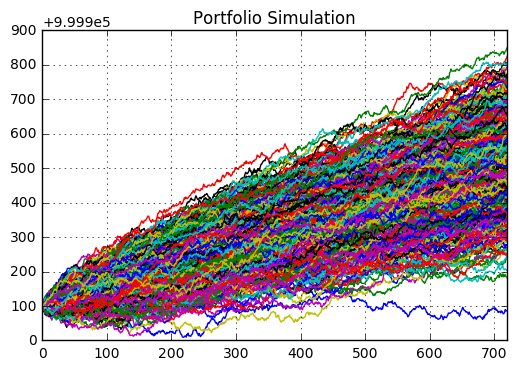

In [742]:
temp = port_vect.iloc[-1]
print('Information at maturity.\n\n\t> Min value: {}\n\t> Max value: {}\n\t> Mean: {}\n\t> Std: {}'.format(
        temp.min(),temp.max(),temp.mean(),temp.std()))

port_vect.plot(legend=False,grid=True)
plt.title('Portfolio Simulation')
plt.show()

In [743]:
def getProbability(value,vector,grater_than = True):
    return sum(vector>value if grater_than else vector<value) / len(vector)

In [751]:
print('\nValor inicial del portafolio: ${:.2f}'.format(initial_value))
print('Valor promedio final: ${:.2f}'.format(np.mean(port_value)))
print('\nProbabilidad de que el portafolio al vencimiento sea mayor que el valor inicial: {:.2f} %'.format(
        100*getProbability(initial_value,port_value)))


Valor inicial del portafolio: $1000000.00
Valor promedio final: $1000414.44

Probabilidad de que el portafolio al vencimiento sea mayor que el valor inicial: 99.90 %


In [771]:
prev = 0
step = 0.0001
for i in np.arange(step,1,step):
    ref = getProbability(initial_value*(1+prev),port_value)
    pr  = getProbability(initial_value*(1+i),port_value)
    print('Probability that portfolio increases from {:0.2f}% to {:0.2f}% is: {:0.4}%'.format(100*prev,100*i,100*(ref-pr)))
    prev = i
    if pr < 0.000001:
        break 

Probability that portfolio increases from 0.00% to 0.01% is: 0.1%
Probability that portfolio increases from 0.01% to 0.02% is: 2.1%
Probability that portfolio increases from 0.02% to 0.03% is: 10.3%
Probability that portfolio increases from 0.03% to 0.04% is: 30.7%
Probability that portfolio increases from 0.04% to 0.05% is: 36.9%
Probability that portfolio increases from 0.05% to 0.06% is: 16.6%
Probability that portfolio increases from 0.06% to 0.07% is: 2.8%
Probability that portfolio increases from 0.07% to 0.08% is: 0.4%


In [769]:
prev = 0
step = 0.005
for i in np.arange(step,1,step):
    ref = getProbability(initial_value*(1-prev),port_value,grater_than=False)
    pr  = getProbability(initial_value*(1-i),port_value,grater_than=False)
    print('Probability that portfolio decreases from {:0.2f}% to {:0.2f}% is: {:0.4}%'.format(-100*prev,-100*i,100*(ref-pr)))
    prev = i
    if pr < 0.000001:
        break 

Probability that portfolio decreases from 0.00% to -0.50% is: 0.1%


## Conclusiones

Sin duda alguna, la simulación es una herramienta muy útil para hacer estimaciones cuando algún problema no tiene solución analítica. Esta herramienta nos ayuda a aproximar la realidad de una forma relativamente sencilla, pero hay que tomar en cuenta que se asumen supuestos para poder llevarla a cabo.
Realizando el presente trabajo nos percatamos que haciendo simulaciones de trayectorias del movimiento geométrico browniano con y sin variables antitéticas, se obtiene que con el segundo método hay una reducción en la varianza de las trayectorias.
Por otro lado, sabiendo que la valuación de opciones europeas tipo call y put se refiere a la estimación de la prima de las mismas (que depende de un precio strike $K$, un tiempo de vencimiento $T$, una tasa libre de riesgo $r$ y precio del activo subyacente en el tiempo de vencimiento $S_T$), se encontró que existen algunas diferencias en el cálculo de las primas con diferentes metodologías: solución analítica de Black Scholes, estimación de la solución de Black Scholes, utilizando simulaciones con la solución de la ecuación diferencial estocástica del precio; y estimación de la solución de Black Scholes, utilizando simulaciones con un método de aproximación numérica, Milstein.
Se obtuvo que las diferencias en las primas fueron de …………… Pudiendo decir que la valuación más “barata” resultó con el método ……….
Si comparamos estos resultados con los obtenidos con variables antitéticas, es decir, con disminución de varianza, se obtiene que …….
Referente a la conformación de un portafolio, los activos seleccionados fueron algunos del IPC resultantes de un primer análisis con la teoría de la frontera eficiente de Markowitz. Una vez que nos dimos cuenta que sólo 9 de los 29 activos iniciales, tomaron un porcentaje representativo de la cartera, se quitaron los demás y se volvió a resolver el problema de optimización donde lo que se busca es maximizar el rendimiento ante un riesgo dado. En este caso se eligió la cartera que se ubicara en la frontera eficiente y que tuviera el menor riesgo (lo que conlleva un menor rendimiento), es decir, el punto más bajo de la frontera.
Se determinó que las ponderaciones óptimas para un portafolio con las emisoras: ……. Es de …….. y con dicha combinación se tiene un rendimiento de …. Y una volatilidad de ……….

Valuando el desempeño del portafolio, medido como la probabilidad de que éste aumente o disminuya su valor, se obtuvo que ……..

## Recomendaciones y trabajos futuros

Recomendaciones para trabajos futuros:
•	Utilizar un número grande de simulaciones para tener estimaciones más precisas en los diversos problemas.
•	Vectorizar, en la medida de lo posible, todo el código.
•	Continuar con la definición de funciones para ejecutar el código.

## Bibliografía

[1] Desmond J. Higham. (2001). 1 Society for Industrial and Applied Mathematics. Recuperado el 4 de marzo de 2017, de http://www.caam.rice.edu/~cox/stoch/dhigham.pdf

[2] Fabrice Douglas Rouah. Euler and Milstein Discretization. Recuperado el 4 de marzo de 2017, de http://www.frouah.com/finance\%20notes/Euler\%20and\%20Milstein\%20Discretization.pdf

[3] Bermejo García Manuel. Modelos de simulación financiera, una herramienta para la gestión. Recuperado el 13 de marzo de 2017, de
https://dialnet.unirioja.es/descarga/articulo/2481722.pdf

[4] Santana, M. (Agosto 2013). Técnicas de reducción de varianza para el método Monte Carlo aplicado a opciones financieras. Recuperado el 18 de marzo de 2017, de http://www.fcfm.buap.mx/assets/docs/docencia/tesis/matematicas/MarisolSantanaAnaya.pdf

[5] Rouah, F. (2007). Euler and Milstein Discretization. Recuperado el 17 de marzo de 2017, de http://www.frouah.com/finance%20notes/Euler%20and%20Milstein%20Discretization.pdf

[6] Martínez Venegas, Francisco. (2008). Riesgos financieros y económicos. México: Cengage Learning. Recuperado el 12 de marzo de 2017.